<a href="https://colab.research.google.com/github/kartikay89/Data-Analysis/blob/main/MachineLearning_ALgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook is dedicated to practising different Machine learning Algorithms**

The alogrithms are in the order:


*   Unsupervised Learning


1. K-means clustering

**Unsupervised Learning**

**K-Means clustering**

Article: https://realpython.com/k-means-clustering-python/

In [96]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

In [97]:
# Creating random data for salary clustering

incomeDF = {
    'Name': ['Kartikay', 'Mayank', 'Dileep', 'Saroj', 'Alika', 'Shruti', 'Reshmi', 'Robin', 'Dhananjay', 'Monu', 'Jijaji', 'xyz', 'abc', 'pqr'],
    'Age': [30, 29, 60, 60, 24, 30, 28, 30, 65, 35, 35, 15, 120, 200],
    'Income($)': [30000, 300000, 150000, 13000000, 500000, 4000000, 20000000, 70000, 8000000, 0, 1000000, 10000, 5000000, 80000]
}

IncomeData = pd.DataFrame(incomeDF)

In [98]:
IncomeData.head()

,Name,Age,Income($)
0,Kartikay,30,30000
1,Mayank,29,300000
2,Dileep,60,150000
3,Saroj,60,13000000
4,Alika,24,500000


Text(0, 0.5, 'Income($)')

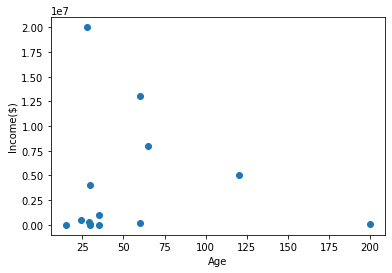

In [99]:
plt.scatter(IncomeData['Age'], IncomeData['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [100]:
# We can see from above plot that there may be 3 clusters i.e, ~30, ~35, ~60
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(IncomeData[ ['Age', 'Income($)'] ])
y_predicted

array([0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0], dtype=int32)

In [101]:
# putting the y_predicted in the existing dataframe to see which clusters people belong t0
IncomeData['Cluster']=y_predicted
IncomeData

,Name,Age,Income($),Cluster
0,Kartikay,30,30000,0
1,Mayank,29,300000,0
2,Dileep,60,150000,0
3,Saroj,60,13000000,1
4,Alika,24,500000,0
5,Shruti,30,4000000,2
6,Reshmi,28,20000000,1
7,Robin,30,70000,0
8,Dhananjay,65,8000000,2
9,Monu,35,0,0


In [102]:
km.cluster_centers_

array([[5.08888889e+01, 2.37777778e+05],
       [4.40000000e+01, 1.65000000e+07],
       [7.16666667e+01, 5.66666667e+06]])

In [103]:
# Creating 3 different df for different clusters
clusterDF0 = IncomeData[IncomeData.Cluster == 0]
clusterDF1 = IncomeData[IncomeData.Cluster == 1]
clusterDF2 = IncomeData[IncomeData.Cluster == 2]

Text(0, 0.5, 'Income($)')

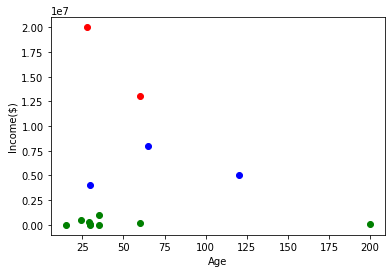

In [104]:
plt.scatter(clusterDF0['Age'],  clusterDF0['Income($)'], color = 'green')
plt.scatter(clusterDF1['Age'],  clusterDF1['Income($)'], color = 'red')
plt.scatter(clusterDF2['Age'],  clusterDF2['Income($)'], color = 'blue')
plt.xlabel('Age')
plt.ylabel('Income($)')

In [105]:
# Remember: if there are values that don't fit in green, red, blue change values in range 0-1 using MinMax Scalar - read.

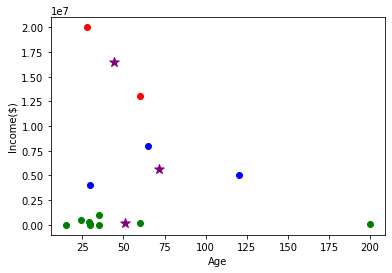

In [106]:
plt.scatter(clusterDF0['Age'],  clusterDF0['Income($)'], color = 'green')
plt.scatter(clusterDF1['Age'],  clusterDF1['Income($)'], color = 'red')
plt.scatter(clusterDF2['Age'],  clusterDF2['Income($)'], color = 'blue')
plt.xlabel('Age')
plt.ylabel('Income($)')


# plotting the center of the cluster
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker='*', s=100)

**let us convert the values in the range of 0-1 for better clustering instead of using 0 - 200000 range - this is called normalizing the values.**

In [107]:
# let us convert the values in the range of 0-1 for better clustering instead of using 0 - 200000 range - this is called normalizing the values.

scaler = MinMaxScaler()
scaler.fit(IncomeData[['Income($)']])
IncomeData['Income($)'] = scaler.transform(IncomeData[['Income($)']])
scaler.fit(IncomeData[['Age']])
IncomeData['Age'] = scaler.transform(IncomeData[['Age']])
IncomeData

,Name,Age,Income($),Cluster
0,Kartikay,0.081081,0.0015,0
1,Mayank,0.075676,0.0150,0
2,Dileep,0.243243,0.0075,0
3,Saroj,0.243243,0.6500,1
4,Alika,0.048649,0.0250,0
5,Shruti,0.081081,0.2000,2
6,Reshmi,0.070270,1.0000,1
7,Robin,0.081081,0.0035,0
8,Dhananjay,0.270270,0.4000,2
9,Monu,0.108108,0.0000,0


Text(0, 0.5, 'Income($)')

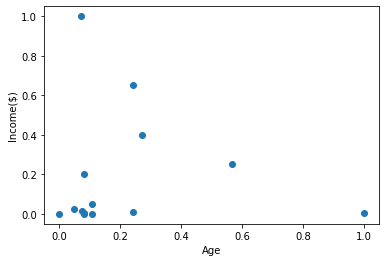

In [108]:
plt.scatter(IncomeData['Age'], IncomeData['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [109]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(IncomeData[ ['Age', 'Income($)'] ])
y_predicted

array([1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0], dtype=int32)

In [110]:
# putting the y_predicted in the existing dataframe to see which clusters people belong t0
IncomeData['Cluster']=y_predicted
IncomeData

,Name,Age,Income($),Cluster
0,Kartikay,0.081081,0.0015,1
1,Mayank,0.075676,0.0150,1
2,Dileep,0.243243,0.0075,1
3,Saroj,0.243243,0.6500,2
4,Alika,0.048649,0.0250,1
5,Shruti,0.081081,0.2000,1
6,Reshmi,0.070270,1.0000,2
7,Robin,0.081081,0.0035,1
8,Dhananjay,0.270270,0.4000,2
9,Monu,0.108108,0.0000,1


In [111]:
# putting the y_predicted in the existing dataframe to see which clusters people belong t0
IncomeData['Cluster']=y_predicted
IncomeData

,Name,Age,Income($),Cluster
0,Kartikay,0.081081,0.0015,1
1,Mayank,0.075676,0.0150,1
2,Dileep,0.243243,0.0075,1
3,Saroj,0.243243,0.6500,2
4,Alika,0.048649,0.0250,1
5,Shruti,0.081081,0.2000,1
6,Reshmi,0.070270,1.0000,2
7,Robin,0.081081,0.0035,1
8,Dhananjay,0.270270,0.4000,2
9,Monu,0.108108,0.0000,1


In [112]:
km.cluster_centers_

array([[0.78378378, 0.127     ],
       [0.09189189, 0.03366667],
       [0.19459459, 0.68333333]])

In [113]:
# Creating 3 different df for different clusters
clusterDF0 = IncomeData[IncomeData.Cluster == 0]
clusterDF1 = IncomeData[IncomeData.Cluster == 1]
clusterDF2 = IncomeData[IncomeData.Cluster == 2]

Text(0, 0.5, 'Income($)')

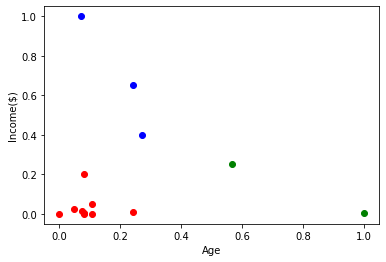

In [114]:
plt.scatter(clusterDF0['Age'],  clusterDF0['Income($)'], color = 'green')
plt.scatter(clusterDF1['Age'],  clusterDF1['Income($)'], color = 'red')
plt.scatter(clusterDF2['Age'],  clusterDF2['Income($)'], color = 'blue')
plt.xlabel('Age')
plt.ylabel('Income($)')

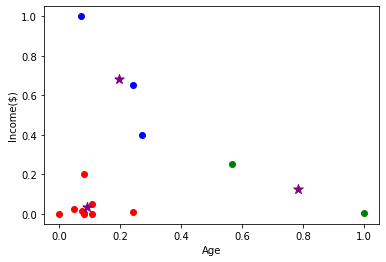

In [115]:
plt.scatter(clusterDF0['Age'],  clusterDF0['Income($)'], color = 'green')
plt.scatter(clusterDF1['Age'],  clusterDF1['Income($)'], color = 'red')
plt.scatter(clusterDF2['Age'],  clusterDF2['Income($)'], color = 'blue')
plt.xlabel('Age')
plt.ylabel('Income($)')


# plotting the center of the cluster
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker='*', s=100)

In [118]:
# Let us check the data for particular clusters
set(IncomeData['Cluster'])

{0, 1, 2}

In [124]:
IncomeData[IncomeData['Cluster'] == 2]

,Name,Age,Income($),Cluster
3,Saroj,0.243243,0.65,2
6,Reshmi,0.070270,1.00,2
8,Dhananjay,0.270270,0.40,2


**Real-World problem : arXiv dataset clustering from kartikaysingh.com**

In [116]:
textlist = []

text_file = open("/content/drive/MyDrive/Google Colab Data /arXiv_titles.txt", "r")
lines = text_file.readlines()

textlist.append(lines)

text_file.close()